# **Tratamento de Dados Part. 2**

In [135]:
import pandas as pd

In [136]:
df = pd.read_csv("countries.csv")
df = df.head(20)
df

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
5,Afghanistan,1977,14880372
6,Afghanistan,1982,12881816
7,Afghanistan,1987,13867957
8,Afghanistan,1992,16317921
9,Afghanistan,1997,22227415


**Trabalhando com pivoteamento**

In [137]:
df.pivot(index = "year", columns = "country", values = "population")

country,Afghanistan,Albania
year,,
1952,8425333.0,1282697.0
1957,9240934.0,1476505.0
1962,10267083.0,1728137.0
1967,11537966.0,1984060.0
1972,13079460.0,2263554.0
1977,14880372.0,2509048.0
1982,12881816.0,2780097.0
1987,13867957.0,3075321.0
1992,16317921.0,NaN


In [138]:
df1 = df.pivot(index = "year", columns = "country", values = "population")
df1.transpose()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,8425333.0,9240934.0,10267083.0,11537966.0,13079460.0,14880372.0,12881816.0,13867957.0,16317921.0,22227415.0,25268405.0,31889923.0
Albania,1282697.0,1476505.0,1728137.0,1984060.0,2263554.0,2509048.0,2780097.0,3075321.0,NaN,NaN,NaN,NaN


In [139]:
df[df.country == "Albania"]

,country,year,population
12,Albania,1952,1282697
13,Albania,1957,1476505
14,Albania,1962,1728137
15,Albania,1967,1984060
16,Albania,1972,2263554
17,Albania,1977,2509048
18,Albania,1982,2780097
19,Albania,1987,3075321


**Trabalhando com strings:**

In [140]:
df2 = pd.read_csv("NationalNames.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [141]:
df2[df2.Name.str[0] == "R"].head()

,Id,Name,Year,Gender,Count
29,30,Rose,1880,F,700
51,52,Rosa,1880,F,507
91,92,Rebecca,1880,F,236
92,93,Ruth,1880,F,234
108,109,Rachel,1880,F,166


In [142]:
df2[df2.Name.str.len() == 3].head()

,Id,Name,Year,Gender,Count
6,7,Ida,1880,F,1472
32,33,Ada,1880,F,652
40,41,Eva,1880,F,614
56,57,May,1880,F,462
70,71,Mae,1880,F,344


In [143]:
#Identificando qual letra tem mais nomes associados

df2.groupby(df2.Name.str[0]).Count.sum().sort_values(ascending = False)

Name
J    43578244
M    31968148
A    27308805
C    24779742
D    23801401
R    23237528
S    20758307
L    18205788
K    16396504
E    16248524
B    16198757
T    14054925
G    10448713
P     9062678
W     8202492
H     7948419
N     7434205
F     5057044
V     4635528
I     3154699
O     1942209
Z     1343022
Y      785463
Q      243155
X      202914
U      138212
Name: Count, dtype: int64

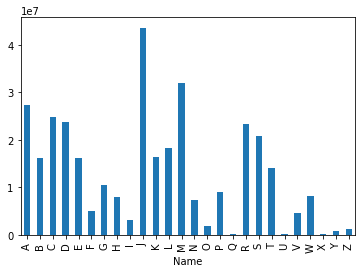

In [144]:
df2.groupby(df2.Name.str[0]).Count.sum().plot(kind = "bar")

# **Tratando nova base de dados**

In [145]:
df3 = pd.read_csv("sao-paulo-properties-april-2019.csv")
df3.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [146]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [147]:
# Alterando números para strings
df3["Elevator"].replace({0: 'nao', 1: 'sim'}, inplace = True)
df3["Furnished"].replace({0: 'nao', 1: 'sim'}, inplace = True)
df3["Swimming Pool"].replace({0: 'nao', 1: 'sim'}, inplace = True)
df3["New"].replace({0: 'nao', 1: 'sim'}, inplace = True)

In [148]:
df3.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,0.000000,0.000000


In [149]:
# Excluindo valores discrepantes de latitude e longitude

df3 = df3[df3.Longitude.between(-48, -44)]
df3 = df3[df3.Latitude.between(-25, -22)]
df3.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Latitude,Longitude
count,1.268800e+04,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000
mean,2.912032e+05,694.959489,84.846548,2.322037,2.109079,1.011665,1.406447,-23.561189,-46.628044
std,5.939851e+05,761.563721,58.263652,0.776323,0.956739,0.822856,0.827474,0.058191,0.087196
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,-24.013939,-47.165859
25%,1.900000e+03,292.000000,50.000000,2.000000,2.000000,1.000000,1.000000,-23.598168,-46.684230
50%,8.500000e+03,505.000000,65.000000,2.000000,2.000000,1.000000,1.000000,-23.555985,-46.643184
75%,3.692250e+05,850.000000,95.000000,3.000000,2.000000,1.000000,2.000000,-23.526162,-46.585110
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,-22.832988,-46.313064


**Como se distribuem imóveis alugados e vendidos?**

In [150]:
df3["Negotiation Type"].unique()


array(['rent', 'sale'], dtype=object)

In [151]:
df3_rent = df3[df3["Negotiation Type"] == "rent"]
df3_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,sim,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204,17000,2200,240,4,5,4,5,nao,nao,nao,nao,Brooklin/São Paulo,rent,apartment,-23.609608,-46.693013
11205,3700,595,73,1,2,1,1,nao,nao,sim,nao,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,sim,sim,sim,nao,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11208,5000,2354,205,3,2,1,2,sim,nao,nao,nao,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


In [152]:
df3_sale = df3[df3["Negotiation Type"] == "sale"]
df3_sale

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,sim,nao,sim,nao,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,sim,sim,sim,nao,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,sim,nao,sim,sim,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,sim,nao,sim,nao,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,nao,sim,sim,nao,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,nao,nao,nao,nao,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,nao,nao,sim,nao,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,nao,nao,sim,nao,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,nao,sim,sim,nao,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74009c350>]],
      dtype=object)

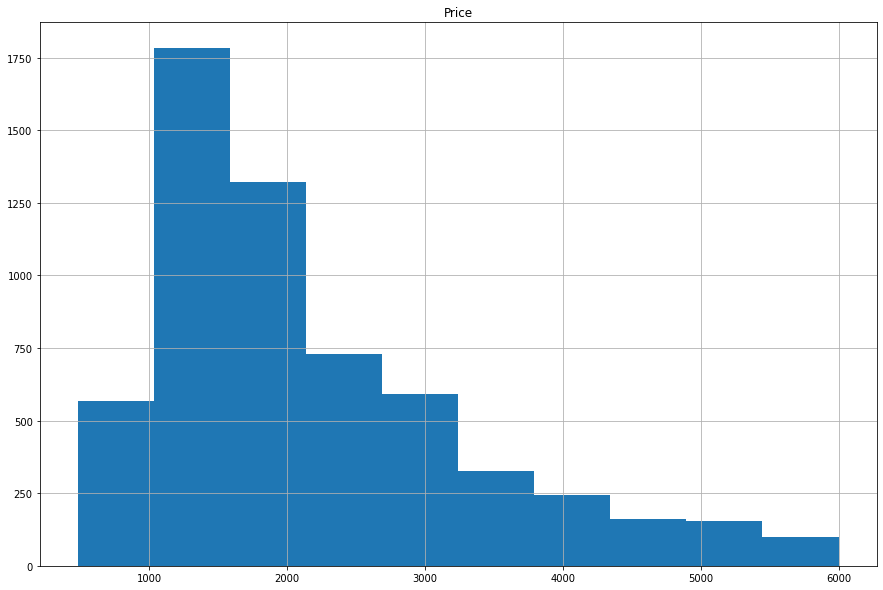

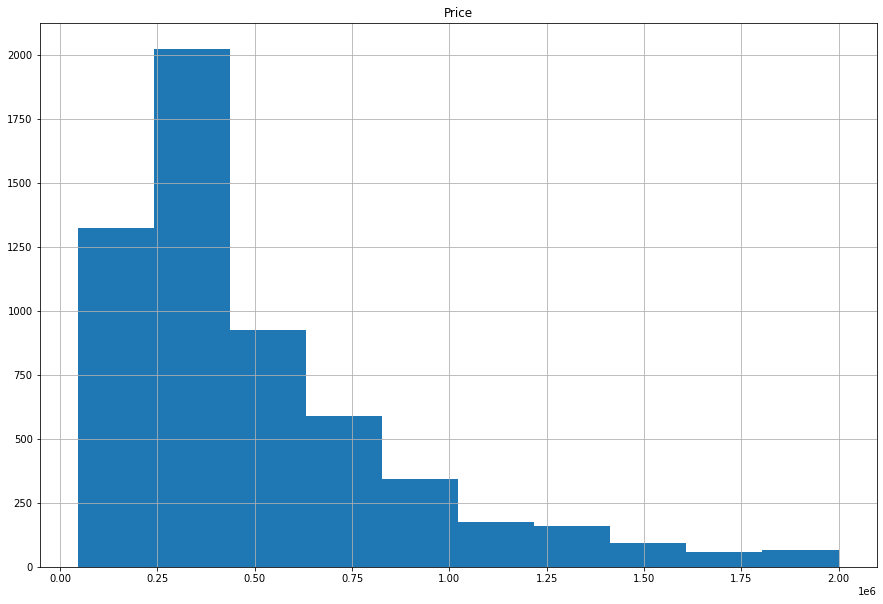

In [153]:
df3_rent[df3_rent.Price < 6000].hist("Price", figsize = (15,10))
df3_sale[df3_sale.Price < 2e6].hist("Price", figsize = (15,10))

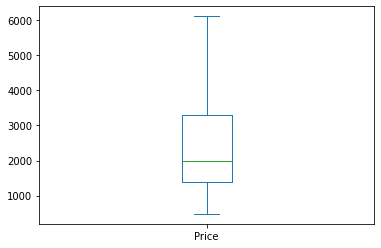

In [154]:
df3_rent.Price.plot(kind = "box", showfliers = False)

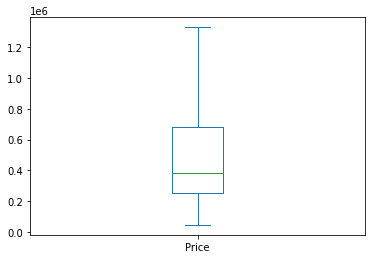

In [155]:
df3_sale.Price.plot(kind = "box", showfliers = False)

**Qual as dez maiores frequências de imóveis considerando quartos, suites e banheiros?**

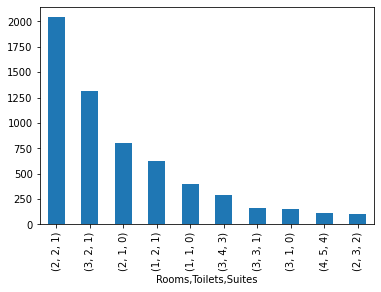

In [156]:
df3_rent.groupby(['Rooms', 'Toilets', 'Suites']).Price.count().sort_values(ascending = False).head(10).plot(kind = "bar")

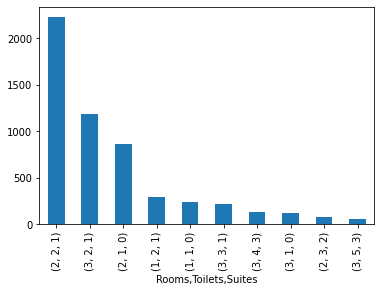

In [157]:
df3_sale.groupby(['Rooms', 'Toilets', 'Suites']).Price.count().sort_values(ascending = False).head(10).plot(kind = "bar")

**Qual o preço médio dos imóveis novos, usados, mobiliados e não mobiliados?**

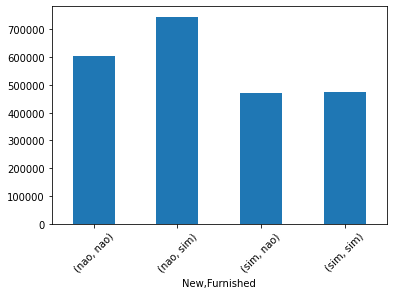

In [158]:
df3_sale.groupby(['New', 'Furnished']).Price.mean().plot(kind = "bar", rot = 45)

**Qual a distribuição dos preços considerando os mesmos atributos anteriores?**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


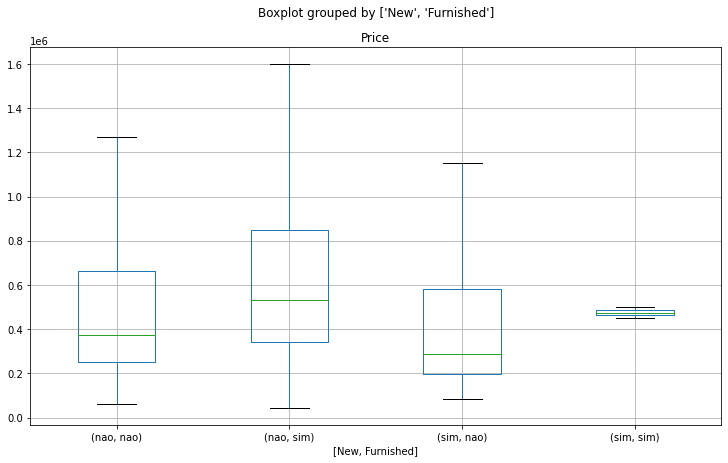

In [159]:
df3_sale.boxplot(column = "Price", by = ['New', 'Furnished'], showfliers = False, figsize = (12,7))

In [160]:
# Confirmando a baixa incidência de imóveis novos e moniliados

df3_sale[(df3.New == "sim") & (df3.Furnished == "sim")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
5679,499000,0,66,2,2,1,2,sim,sim,sim,sim,Sé/São Paulo,sale,apartment,-23.532207,-46.564974
12293,450000,600,42,1,2,1,2,sim,sim,sim,sim,Santana/São Paulo,sale,apartment,-23.515560,-46.633127


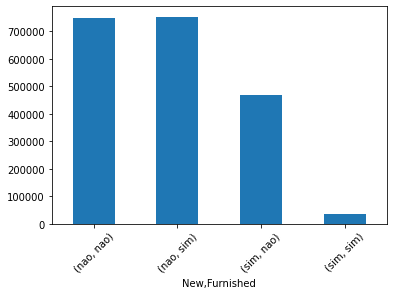

In [161]:
df3_sale.groupby(['New', 'Furnished']).Price.std().plot(kind = "bar", rot = 45)

**Existe relação entre o preço dos imóveis e o valor do condomínio?**

In [162]:
import matplotlib.pyplot as plt


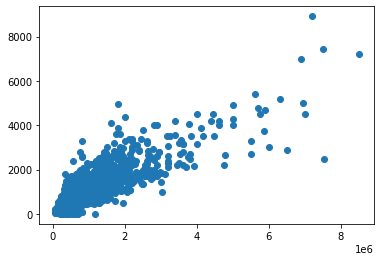

In [163]:
plt.scatter(df3_sale.Price[df3_sale.Condo > 0], df3_sale.Condo[df3_sale.Condo > 0]) # O filtro de Condo > 0 está sendo usado para eliminar os registros com cond = 0.

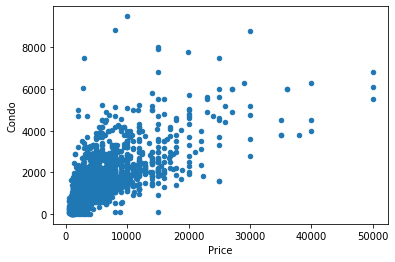

In [164]:
# Aplicando o scatter plot direto no Data Frame

df3_rent[df3_rent.Condo > 0].plot(kind = "scatter", x = "Price", y = "Condo")

**Plotando as coordenadas geográficas identificando a região que possui os maiores preços de aluguel**

In [165]:
df3_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,nao,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,sim,nao,nao,nao,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


(-46.98443175, -46.338451250000006, -23.773289955, -23.376762945)

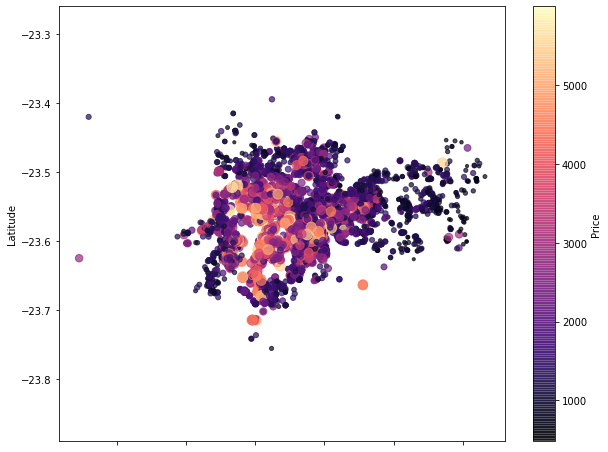

In [166]:
df3_rent[df3_rent.Price < 6000].plot(kind = "scatter", x= "Longitude", y= "Latitude", c= "Price" , figsize = (10,8), cmap = "magma", s= df3_rent[df3_rent.Price < 6000].Price / 50, alpha = 0.7)
plt.axis("equal")

**Plotando em gráfico a média dos dez maiores e menores preços de aluguel**

Text(0.5, 0, 'Distrito')

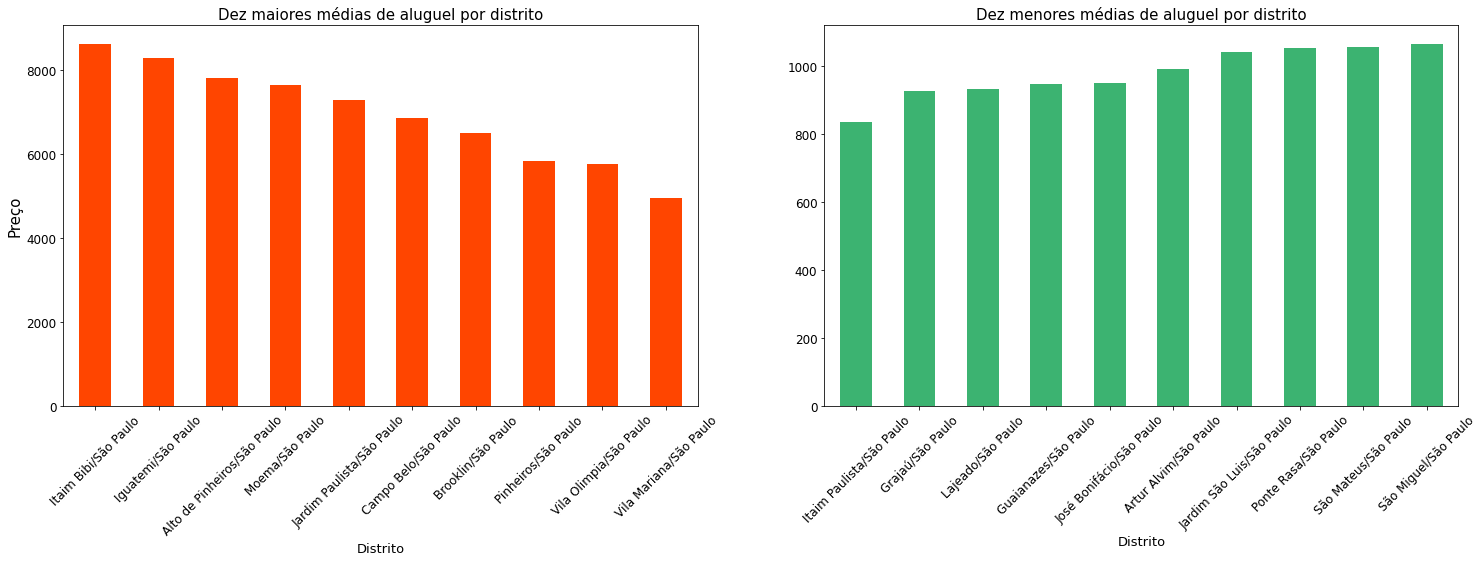

In [167]:
plt.figure(1)
plt.subplot(1,2,1)
df3_rent.groupby(by = "District").Price.mean().sort_values(ascending = False).head(10).plot(kind = "bar", rot = 45, fontsize = 12, figsize = (25,7), color = "orangered")
plt.title("Dez maiores médias de aluguel por distrito", size = 15)
plt.ylabel("Preço", size = 15)
plt.xlabel("Distrito", size = 13)

plt.subplot(1,2,2)
df3_rent.groupby(by = "District").Price.mean().sort_values(ascending = True).head(10).plot(kind = "bar", rot = 45, fontsize = 12, color = "mediumseagreen")
plt.title("Dez menores médias de aluguel por distrito", size = 15)
plt.xlabel("Distrito", size = 13)
